# 95-865 Fall 2018 Quiz

Your name: Zhining Zhou

Your Andrew ID: zhiningz

There are two problems. The first problem is mainly about making sure you can code up various things from the first half of 95-865. The second problem is more conceptual: we give you intermediate outputs of some analyses that we have done on a particular dataset, and ask you to answer some follow-up questions.

In [2]:
# DO NOT MODIFY THIS BLOCK (BUT YOU SHOULD RUN THIS FIRST)

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Problem 1 [50 points]

**(a) [5 points]** Begin by reading in the book titles from the file `all_book_titles.txt` (which should be in the same folder as this Jupyter notebook). Complete the following tasks:

   1. Read the book titles into a list of strings named `titles`.
   2. Display the first 8 titles in your list. 
   3. Print the total number of book titles in your list.
   

In [8]:
# YOUR CODE HERE
with open('all_book_titles.txt') as f:
    titles = f.readlines()

titles = [x.strip() for x in titles] 
print("The first 8 titles")
print(titles[:8])
print("Total number of book titles")
print(len(titles))

The first 8 titles
["Scholars' Guide to Washington, D. C. for East Asian Studies China, Japan, Korea, and Mongolia", "Gardner's Art through the Ages: A Global History, Volume II (Book Only)", 'Criminology : The Core', 'Pharmacology for the Primary Care Provider', 'Calculus: Concepts and Contexts', 'Wars in the Woods The Rise of Ecological Forestry in America', 'Pharmacology for the Surgical Technologist', 'Essentials of Economics, 3rd Edition (The McGraw-Hill Series in Economics)']
Total number of book titles
2373


**(b) [25 points]** Build the frequency table. Specifically, complete the following tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Count the number of times each word appears in the file and build a frequency table. 
  3. Sort the table and print the top 20 most frequent words, along with their frequencies and ranks.
  4. From results in step 3, which of those 20 words that you think could be added into stopwords for this problem? Add those new stopwords you chose, and recompute the frequency table. Plot the top 10 words in bar plots.
  
  
Notes: 
* When counting the words, use raw counts as the "frequency". DO NOT divide by the total number of words in the file. 
* DO NOT include words (tokens) that are stopwords/punctuation/spaces/short words with length<3. 
* For stopwords, use the stopwords provided in the file `stopwords.txt` (which should be in the same folder as this Jupyter notebook).


In [15]:
# YOUR CODE HERE
import spacy
nlp = spacy.load('en')  # load spaCy's built-in English models
text = open('all_book_titles.txt').read()
parsed_text = nlp(text)

with open('stopwords.txt') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

from collections import Counter

histogram_with_some_filtering = Counter()

for token in parsed_text:
    lemma = token.lemma_.lower()
    if not (token.pos_ == 'PUNCT' or token.pos_ == 'SPACE' or len(lemma) < 3 or lemma in stopwords):
        histogram_with_some_filtering[lemma] += 1
    
from operator import itemgetter
sorted_lemma_count_pairs = sorted(histogram_with_some_filtering.items(),
                                  reverse=True,
                                  key=itemgetter(1))
i = 0
for lemma, count in sorted_lemma_count_pairs:
    if (i == 20):
        break
    print(lemma, ":", count)
    i += 1


edition : 474
introduction : 242
science : 135
history : 124
series : 100
approach : 93
computer : 90
business : 90
access : 84
biology : 82
theory : 78
card : 77
art : 76
applications : 76
analysis : 74
world : 73
human : 72
chemistry : 70
statistics : 69
design : 68


edition, introduction, series, access, approach, applications, analysis, design could also be stop words. 

['a', 'about', 'above', 'across', 'after', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'an', 'and', 'another', 'any', 'anybody', 'anyone', 'anything', 'anywhere', 'are', 'area', 'areas', 'around', 'as', 'ask', 'asked', 'asking', 'asks', 'at', 'away', 'b', 'back', 'backed', 'backing', 'backs', 'be', 'became', 'because', 'become', 'becomes', 'been', 'before', 'began', 'behind', 'being', 'beings', 'best', 'better', 'between', 'big', 'both', 'but', 'by', 'c', 'came', 'can', 'cannot', 'case', 'cases', 'certain', 'certainly', 'clear', 'clearly', 'come', 'could', 'd', 'did', 'differ', 'different', 'differently', 'do', 'does', 'done', 'down', 'down', 'downed', 'downing', 'downs', 'during', 'e', 'each', 'early', 'either', 'end', 'ended', 'ending', 'ends', 'enough', 'even', 'evenly', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'f', 'face', 'faces', 'fact', 'facts', 'far', 'felt', 'few', 'find', 'finds', 'first

Text(0, 0.5, 'Raw count')

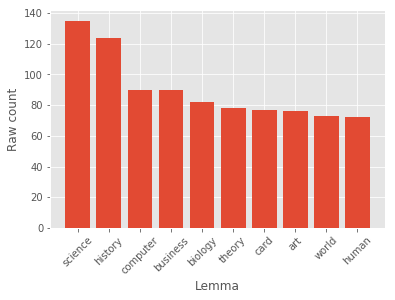

In [16]:
list = ['edition','introduction','series','access', 'applications', 'approach', 'analysis', 'design']
stopwords.extend(list)
print(stopwords)
histogram_with_additional_stopwords = Counter()

for token in parsed_text:
    lemma = token.lemma_.lower()
    if not (token.pos_ == 'PUNCT' or token.pos_ == 'SPACE' or len(lemma) < 3 or lemma in stopwords):
        histogram_with_additional_stopwords[lemma] += 1
    
sorted_lemma_with_additional_stopwords = sorted(histogram_with_additional_stopwords.items(),
                                  reverse=True,
                                  key=itemgetter(1))

num_top_lemmas_to_plot = 10
top_lemmas = [lemma for lemma, count in sorted_lemma_with_additional_stopwords[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in sorted_lemma_with_additional_stopwords[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts)
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=45)
plt.xlabel('Lemma')
plt.ylabel('Raw count')

**(c) [20 points]** We now use k-means to cluster the book titles. The goal of this problem is to (1) choose the best `k` based on the silhouette score and (2) interpret the clustering results.


* (1) For each k=10,30,50,...,190: cluster all the book titles (in full-dimensionality, so don't reduce dimensions!) into k clusters, and compute and print the silhouette score for this choice of k. (Note: you don't need to know the details of what the ["silhouette score"](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) is computing!--for the purposes of this exam, you just need to know that a higher silhouette score is better.)

* (2) After you obtain the best `k`, print out the book titles in the first 5 clusters given by the best model, and interpret each cluster briefly. 

Before we cluster the book titles using k-means, we need to represent each title as a feature vector, very similar to building a histogram. We have provided this code for you. The code uses scikit-learn's `TfidfVectorizer` class, which represents each document as a feature vector. The resulting variable `X` is a 2-D numpy array, and has rows corresponding to book titles, and columns corresponding to different words. For the purposes of this quiz, you do *not* have to worry about how this works. Just treat `X` as a 2D numpy array where rows are feature vectors.

In [17]:
# DO NOT MODIFY CODE IN THIS CELL

# If your code above works correctly, then running this cell should result
# in the variable `X` being a 2D numpy array with shape (2373, 291)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10, max_df=0.8)
X = vectorizer.fit_transform(titles)  # This is stored as a sparse array, so as to save memory

print(X.shape) # The output should be (2373, 291)

(2373, 291)


In [21]:
# YOUR CODE HERE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -np.inf
best_k = None
best_model = None
best_cluster_assignments = None

for k in range(10, 210, 20):
    candidate_kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    candidate_kmeans.fit(X)
    cluster_assignments = candidate_kmeans.predict(X)
    score = silhouette_score(X, cluster_assignments)
    
    print('k =', k, 'has silhouette score', score)
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = candidate_kmeans
        best_cluster_assignments = cluster_assignments
    
print('Best k within 10, 30, ..., 190 according to silhouette score:', best_k)

k = 10 has silhouette score 0.03775329920152041
k = 30 has silhouette score 0.08993829960297525
k = 50 has silhouette score 0.1272831401322234
k = 70 has silhouette score 0.14645922417482043
k = 90 has silhouette score 0.158505342927869
k = 110 has silhouette score 0.16193706313283704
k = 130 has silhouette score 0.1569908407617113
k = 150 has silhouette score 0.15113858410975486
k = 170 has silhouette score 0.15166443549082287
k = 190 has silhouette score 0.15384976946362977
Best k within 10, 30, ..., 190 according to CH index: 110


In [37]:
clusters = []

for k in range(5):
    cl = [i for idx,i in enumerate(titles) if best_cluster_assignments[idx]==k]
    clusters.append(cl)
    
for c in range(5):
    print('Cluster', (c+1), ':')  
    for bk in range(len(clusters[c])):
        print(clusters[c][bk])
    print()

Cluster 1 :
Essentials of Economics, 3rd Edition (The McGraw-Hill Series in Economics)
New Perspectives on Industrial Organization: With Contributions from Behavioral Economics and Game Theory (Springer Texts in Business and Economics)
Principles of Economics
Managerial Economics & Business Strategy
Environmental Economics: An Introduction (The Mcgraw-Hill)
Essentials of Economics
International Economics : Theory and Policy
Fundamentals of Economics
Labor Economics
Economics, 9th Edition (The McGraw-Hill Series in Economics)
Economics: The Basics (Mcgraw-Hill/Irwin Series in Economics)
Principles of Economics (11th Edition)
International Economics (The Mcgraw-Hill Series Economics)
Economics Private and Public Choice 14e
Urban Economics
Contemporary Labor Economics (The Mcgraw-Hill Series Economics)
Economics
International Economics (6th Edition) (Pearson Economics)
Economics Today: The Micro View (17th Edition)
Managerial Economics
International Monetary & Financial  Economics (Pearso

**Please write down your interpretation of the clusters**: WRITE YOUR ANSWER HERE

# Problem 2 [50 points]

In this problem, we examine part of the Fashion MNIST dataset by Zalando Research. In particular, we look at 10,000 images, each 28 pixels by 28 pixels, where each image is of one of the following 10 items:

- T-shirt/top (encoded by the integer 0)
- Trouser (encoded by the integer 1)
- Pullover (2)
- Dress (3)
- Coat (4)
- Sandal (5)
- Shirt (6)
- Sneaker (7)
- Bag (8)
- Ankle boot (9)

We are intentionally *not* giving you the raw images. Instead, we provide you with some intermediate results from some analyses we have already done, and we ask you some follow-up questions.

In what follows, assume the following: each image is represented as a 784-dimensional feature vector (corresponding to flattening the image's raw grayscale pixels to go from an 28 by 28 image). For each feature vector, each feature is stored as a value between 0 (black) and 1 (white). Below is a plot of many example images from the Fashion MNIST dataset:

![Fashion MNIST examples](./fashion-mnist-sprite.png)

**(a) [5 points]** We ran PCA and got the following plot:

![PCA plot](./Fall2018_quiz_PCA.png)

Note that the horizontal axis corresponds to the first principal component, and the vertical axis corresponds to the second principal component. The explained variance ratio for the first and second principal components are 0.2902809 and 0.17902619, respectively.

Even though the explained variance ratios are quite low, your friend Alice says that actually PCA is not too bad if you're mainly concerned about distinguishing between images that are of sneakers/sandals vs those that are not, and moreover you don't care about trying to tell apart sneakers from sandals. In fact, she says that even just using PCA with 1 dimension is fine. Why might Alice say this?

**Your answer here (no code is needed for this answer):** When just looking at the horizontal axis, it could differentiate sneakers/sandals from those that are not. 

**(b) [10 points]** We have provided the weights for the first two PCA components below, along with the feature vectors of 10 images. We have also provided a mean offset vector. Compute the low-dimensional PCA representation of these 10 images *using the weights provided*, where as a preprocessing step, *be sure to subtract the mean offset vector from each feature vector*.

In [3]:
# DO NOT MODIFY THIS CELL

weights_for_first_principal_component = np.loadtxt('Fall2018_quiz_PCA_weights_1.txt')
weights_for_second_principal_component = np.loadtxt('Fall2018_quiz_PCA_weights_2.txt')
mean_offset_vector = np.loadtxt('Fall2018_quiz_PCA_mean_offset.txt')
ten_feature_vectors = np.loadtxt('Fall2018_quiz_PCA_ten_feature_vectors.txt')

In [4]:
low_dimensional_vectors = np.zeros((10, 2))  # for you to fill out
for i in range(10):
    low_dimensional_vectors[i,0] = np.inner(weights_for_first_principal_component, 
                                            ten_feature_vectors[i,:] - mean_offset_vector)
    low_dimensional_vectors[i,1] = np.inner(weights_for_second_principal_component,
                                           ten_feature_vectors[i,:] - mean_offset_vector)
print(low_dimensional_vectors)

[[ 5.4590781  -1.30941671]
 [-0.15553542 -6.13815182]
 [-3.25027977 -0.56589659]
 [ 3.07398627  0.83821225]
 [ 1.03865001 -3.78438213]
 [-0.69872836 -0.02718894]
 [-0.02365169  6.77955801]
 [ 1.09304693 -0.29477232]
 [-5.715559   -0.62636351]
 [-0.54474717 -3.37477831]]


**(c) [25 points]** We ran t-SNE and ended up with the following plot:

![t-SNE image](./Fall2018_quiz_tSNE.png)

Below, we provide a *subsample* of the images used to construct the above t-SNE plot, along with their low-dimensional t-SNE representations and their labels:

In [5]:
image_vectors = np.loadtxt('Fall2018_quiz_subsample_image_vectors.txt')
tsne_vectors = np.loadtxt('Fall2018_quiz_subsample_tsne_vectors.txt')
labels = np.loadtxt('Fall2018_quiz_subsample_labels.txt').astype(np.int)

# the i-th row of `image_vectors` has t-SNE representation given by `tsne_vectors[i]` and has label `labels[i]`

From looking at the t-SNE plot, your friend Bob wants to know why coats and pullovers overlap so much in the plot. He wonders whether the two types of clothing are just really hard to tell apart. You decide to help Bob answer this question.

Using the above subset of images (in the previous cell), write code that completes the following tasks:

1. Compute the mean 2D coordinate of the low-dimensional t-SNE representations of images corresponding to coats (using the known labels)
2. Find the coat image with t-SNE representation closest (in Euclidean distance) to the mean computed in step 1; plot this coat image as a 28-by-28 pixel image using the `plt.imshow` function with attribute `cmap='gray'`
3. Find the pullover image with t-SNE representation closest (in Euclidean distance) to the mean computed in step 1; plot this pullover image again as a 28-by-28 pixel image using `plt.imshow` with `cmap='gray'`

In [45]:
# YOUR CODE HERE
li = []
for i in range(len(labels)):
    if (labels[i] == 4):
        li.append(tsne_vectors[i])
x_sum = 0
y_sum = 0
for i in range(len(li)):
    x_sum += li[i][0]
    y_sum += li[i][1]

x_mean = x_sum / len(li)
y_mean = y_sum / len(li)

print(x_mean, y_mean)

li[0]

-14.999514558361572 35.74414237060593


array([-32.23932648,  26.74319267])

In [46]:
closest = np.inf
x = 0
for i in range(len(li)):
    dist = (li[i][0] - x_mean) ** 2 + (li[i][1] - y_mean) ** 2
    if (dist < closest):
        closest = dist
        x = i
        
x

29

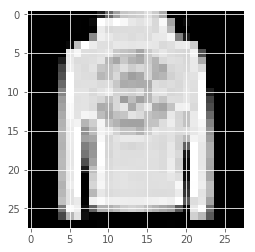

In [47]:
plt.imshow(image_vectors[x].reshape((28,28)), cmap='gray')

In [ ]:
# step 1: compute mean coat t-SNE vector
coat_mask = (labels == 4)
coat_mean_tsne_vector = tsne_vectors[coat_mask].mean(axis=0)

In [40]:
arg_min

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05098039,
       0.31372549, 0.49411765, 0.65882353, 0.69411765, 0.67843137,
       0.65098039, 0.58039216, 0.38431373, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.        , 0.        , 1.        , 0.70588235, 0.65490196,
       0.64313725, 0.7372549 , 0.83529412, 0.76078431, 0.70196078,
       0.71764706, 0.81568627, 0.15294118, 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00392157, 0.        , 0.        , 0.29019608,
       0.81568627, 0.59215686, 0.6627451 , 0.85098039, 0.67843137,
       0.63137255, 0.78039216, 0.54509804, 0.48235294, 0.81960

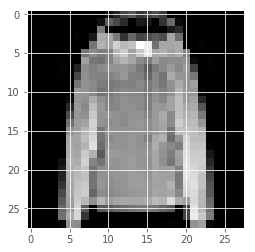

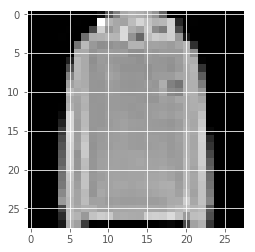

In [38]:
# step 2: find coat that has t-SNE vector closest to the mean coat t-SNE vector
min_dist = np.inf
arg_min = None
for image_vector, tsne_vector in zip(image_vectors[coat_mask],
                                     tsne_vectors[coat_mask]):
    dist = np.linalg.norm(tsne_vector - coat_mean_tsne_vector)
    if dist < min_dist:
        min_dist = dist
        arg_min = image_vector
plt.figure()
plt.imshow(arg_min.reshape((28, 28)), cmap='gray')

# step 3: find coat that has t-SNE vector closest to the mean coat t-SNE vector
pullover_mask = (labels == 2)
min_dist = np.inf
arg_min = None
for image_vector, tsne_vector in zip(image_vectors[pullover_mask],
                                     tsne_vectors[pullover_mask]):
    dist = np.linalg.norm(tsne_vector - coat_mean_tsne_vector)
    if dist < min_dist:
        min_dist = dist
        arg_min = image_vector
plt.figure()
plt.imshow(arg_min.reshape((28, 28)), cmap='gray')

-7.679827477983249 37.34418884079943


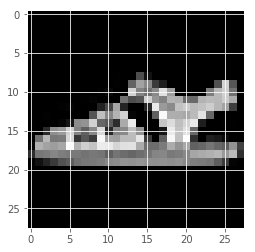

In [48]:
li = []
for i in range(len(labels)):
    if (labels[i] == 2):
        li.append(tsne_vectors[i])
x_sum = 0
y_sum = 0
for i in range(len(li)):
    x_sum += li[i][0]
    y_sum += li[i][1]

x_mean = x_sum / len(li)
y_mean = y_sum / len(li)

print(x_mean, y_mean)

closest = np.iinfo(np.intp).max
x = 0
for i in range(len(li)):
    dist = (li[i][0] - x_mean) ** 2 + (li[i][1] - y_mean) ** 2
    if (dist < closest):
        closest = dist
        x = i
        
plt.imshow(image_vectors[x].reshape((28,28)), cmap='gray')


What do you notice from your images for steps 2 and 3 above?

**Your answer here (no code is needed for this answer)**: WRITE YOUR ANSWER HERE

**(d) [10 points]** In class, we talked about a simple standardization technique in which we subtract off the mean of each feature value and also divide by the standard deviation. Your friend Alice says that since the images we are looking at consist of clothing articles and fashion accessories with the same backdrop in the image, dividing each feature by the standard deviation is a bad idea for preprocessing in this setting. Is she right? Why or why not?

**Your answer here (no code is needed for this answer)**: WRITE YOUR ANSWER HERE